<h1> Lidar Data's Mapping </h1>
<p> With the help of Google Colab and Google Drive, this code performs visual mapping using location information from the lidar. </p>
<p>Cihan Çivit Software Engineer</p>

<h2> Phase 1 </h2>
<p>Connection between Google Colab and Google Drive </p>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h2>Phase 2</h2>
<p>Linking Database on Google Drive and using all datas.</p>
<p>Finding location of dedected points and marking of point on blank page</p>

lidar_data: [(0.1, 382.1), (0.2, 383.1), (0.3, 386.1), (0.4, 386.1), (0.5, 388.1), (0.6, 389.1), (0.7, 389.1), (0.8, 390.1), (0.9, 392.1), (1.0, 392.1), (1.1, 393.1), (1.2, 395.1), (1.3, 395.2), (1.4, 396.2), (1.5, 398.2), (1.6, 399.2), (1.7, 399.2), (1.8, 400.2), (1.9, 402.3), (2.0, 403.3), (2.1, 403.3), (2.2, 405.3), (2.3, 406.4), (2.4, 407.4), (2.5, 407.4), (2.6, 409.5), (2.7, 410.5), (2.8, 412.5), (2.9, 412.6), (3.0, 413.6), (3.1, 415.7), (3.2, 416.7), (3.3, 416.7), (3.4, 417.8), (3.5, 419.8), (3.6, 420.9), (3.7, 422.9), (3.8, 424.0), (3.9, 424.0), (4.0, 425.1), (4.1, 427.1), (4.2, 428.2), (4.3, 430.3), (4.4, 431.3), (4.5, 431.4), (4.6, 433.4), (4.7, 434.5), (4.8, 435.6), (4.9, 437.6), (5.0, 438.7), (5.1, 440.8), (5.2, 440.9), (5.3, 441.9), (5.4, 443.0), (5.5, 445.1), (5.6, 446.2), (5.7, 448.3), (5.8, 449.4), (5.9, 450.4), (6.0, 452.5), (6.1, 453.6), (6.2, 453.7), (6.3, 456.8), (6.4, 456.9), (6.5, 459.0), (6.6, 460.1), (6.7, 461.2), (6.8, 463.3), (6.9, 464.4), (7.0, 466.5), (7.1, 4

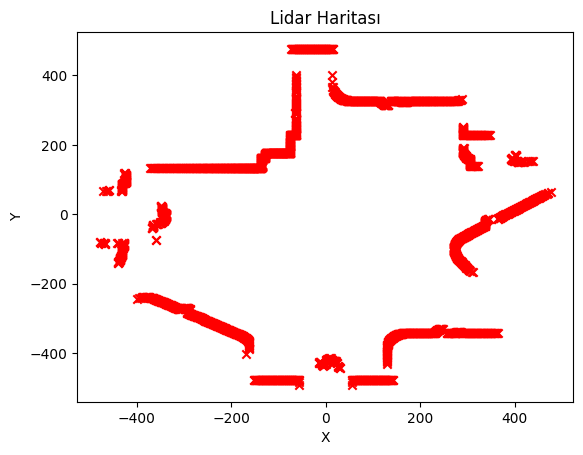

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
data_path = "/content/gdrive/MyDrive/data.txt"
def read_lidar_data(data_path):

    if not os.path.exists(data_path):
        print(f"Hata: Dosya bulunamadı: {data_path}")
        exit()

    lidar_data = []
    with open(data_path, 'r') as f:
        for line in f.readlines():
            if "->" in line:  # Check for lines containing "->"
                _, data_str = line.split("->")  # Extract the part after "->"
                angle, distance = data_str.split(":/:")
                lidar_data.append((float(angle), float(distance)))

    return lidar_data

def lidar_to_cartesian(lidar_data):

    cartesian_data = []
    for angle, distance in lidar_data:
        x = distance * np.cos(np.radians(angle))
        y = distance * np.sin(np.radians(angle))
        cartesian_data.append((x, y))

    # Debugging statements
    print("lidar_data:", lidar_data)
    print("cartesian_data:", cartesian_data)

    return cartesian_data


def plot_lidar_data(cartesian_data, filename):

    x, y = zip(*cartesian_data)
    plt.scatter(x, y, color='red', marker='x')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Lidar Haritası")

# Lidar veri dosyası
lidar_data_file = "/content/gdrive/MyDrive/data.txt"

# Lidar verilerini okuma
lidar_data = read_lidar_data(lidar_data_file)

# Lidar verilerini kartezyen koordinatlara dönüştürme
cartesian_data = lidar_to_cartesian(lidar_data)

# Lidar verilerini matplotlib grafiğinde çizme ve PNG formatında kaydetme
plot_lidar_data(cartesian_data, "/content/gdrive/MyDrive/blank.png")

print("Lidar haritası lidar_haritasi.png olarak oluşturuldu.")
